<a href="https://colab.research.google.com/github/rselent/this_was_a_test/blob/master/build1_Airbnb_in_nyc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

nyc_map = mpimg.imread( 'https://raw.githubusercontent.com/rselent/this_was_a_test/master/New_York_City_2.png')
df = pd.read_csv( 'https://raw.githubusercontent.com/rselent/this_was_a_test/master/AB_NYC_2019.csv')

## THE following rename/drop statements were initially conceived in a later 
## container, but were moved up here for runtime expedience
df = df.rename( columns= {'neighbourhood_group':'Borough', 
                          'room_type':'Style'})
df1 = df.drop( columns= {'host_name', 'number_of_reviews', 'last_review', 
                         'reviews_per_month', 'calculated_host_listings_count'})
print( df.shape)
print( df1.shape)
df1.head()

(48895, 16)
(48895, 11)


,id,name,host_id,Borough,neighbourhood,latitude,longitude,Style,price,minimum_nights,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,0


In [0]:
## DRAWS a city map underneath scatter plot - pass in the dataframe you want to use
## (wtf1, wtf2, df, etc) and what you want it colored by (borough, neighborhood, a price bin(NYI))
def nycMapPlot( dataDF, colorBy, plotTitle):
    sns.set_style( 'dark', {'ytick.left': True, 'xtick.bottom': True})
    sns.set_context( 'notebook')
    plt.figure( figsize= (12, 12))
    f= sns.scatterplot( x= 'longitude', y= 'latitude', data= dataDF, 
                    hue= colorBy, s= 16);
    plt.imshow( nyc_map, aspect= 'equal', extent=[ df['longitude'].min() - 0.0195, 
                                                   df['longitude'].max() + 0.027, 
                                                   df['latitude'].min() - 0.0069, 
                                                   df['latitude'].max() + 0.0025])
    f.set( xlabel= "Longitude", 
           ylabel= "Latitude",
           title= plotTitle)
    f.legend( loc= 2)
    plt.show()

## GROUPED bar plot of data passed through colorBy, categorized by borough, 
## shaped by dataframe used in dataDF
def nycBarPlot( dataDF, colorBy, plotTitle):
    sns.set( style= 'darkgrid')
    f= sns.catplot( x= 'Borough',  hue= colorBy, data= dataDF,
                   height= 9, kind= 'count', legend_out= False, 
                   row_order= (['Brooklyn', 'Manhattan', 'Queens', 
                                'Bronx', 'Staten Island']));
    f.set( xlabel= "NYC Borough", 
           ylabel= "Number of rentals",
           yticklabels= ([ '0', '2,000', '4,000', '6,000', '8,000',
                           '10,000', '12,000']),
           title= plotTitle)

## GROUPED strip plot of data passed through colorBy, categorized by borough, 
## shaped by dataframe used in dataDF
def nycPricePlot( dataDF, colorBy, plotTitle):
    sns.set_style( 'darkgrid', {'ytick.left': True})
    f= sns.catplot( x= 'Borough', y= 'price',  hue= colorBy, data= dataDF,
                   height= 9, jitter= '0.25', legend_out= False,
                   row_order= (['Brooklyn', 'Manhattan', 'Queens', 
                                'Bronx', 'Staten Island']));
    f.set( xlabel= "NYC Boroughs", 
           ylabel= "Price, in USD",
           ylim= (0, 825),
           yticklabels= ([ '$0', '$100', '$200', '$300', '$400',
                           '$500', '$600', '$700' ,'$800']),
           title= plotTitle)

## BOXPLOT, showing expected/mean/most common and outlier prices per Borough, 
## grouped according to colorBy variable, per dataDF dataframe
def nycPriceBars( dataDF, colorBy, plotTitle):
    sns.set_style( 'darkgrid', {'ytick.left': True})
    plt.figure( figsize= (12, 12))
    f= sns.boxplot( x='Borough', y='price', hue= colorBy, data= dataDF,
                    notch= True, order= (['Brooklyn', 'Manhattan', 
                                          'Queens', 'Bronx', 'Staten Island']));
    f.set( xlabel= "NYC Boroughs", 
           ylabel= "Price, in USD",
           ylim= (0, 4100),
           yticklabels= ([ '$0', '$500', '$1000', '$1500', '$2000',
                           '$2500', '$3000', '$3500', '$4000']),
           title= plotTitle)

## I NOTICED some overlap with host_id variables appearing more than once, so
## I wondered how deep it really went.
## ADDS a 'Properties per Host' dimension that tracks specifically this, although
## I had trouble appending it directly to the df1 dataframe, so I had to create
## a temporary variable (wtfPPH) and store the value_counts data there, transform 
## that var into a dataframe, alter that dataframe until it's in a merge-able
## state, then merge it back into main (df1)
def createPPH():
    wtfPPH = df1['host_id'].value_counts()
    print( "\nUnique hosts in this area:", wtfPPH.shape, "\n\n")

    wtfPPH = pd.DataFrame( wtfPPH)
    wtfPPH['hostID'] = wtfPPH.index
    wtfPPH['properties_per_host'] = wtfPPH['host_id']
    wtfPPH['host_id'] = wtfPPH['hostID']
    wtfPPH = wtfPPH.drop( columns= ['hostID'])

    wtf2 = pd.merge( df1, wtfPPH,
                    how = 'right',
                    on = 'host_id')
    return wtf2

In [0]:
### VALUE

# Through my work and exploration of this data, I expect my audience/customers/clients
# to have a better understanding or picture of the airbnb market in new york. 
#
# It sounds a little didactic, but hear me out, lol
#
# The value I intend to provide is not only in raw numbers (number of units, 
# distribution between each borough, distribution between each rental type, 
# and ranges of prices), but also in outlying data -- 
# potential things to watch out for, or properties who seem to be trying to 
# exploit a market or potential renters, or even skirt commercial rules 
# (e.g., number of properties with a minimum rental length of 30+ days 
# (that's what, a timeshare, at that point?), hosts who operate >10 properties 
# (a property management co, at that point), and so on)

In [19]:
## THIS is very interesting and compelling data insights, but how can I show it
## with visualizations???

wtf2 = createPPH()

wtf1 = df1.loc[( df1['minimum_nights'] > 30), ['name', 'host_id', 'Borough',
                                            'neighbourhood', 'latitude',
                                            'longitude', 'Style',
                                            'price', 'minimum_nights']]
print( (df1['minimum_nights'] > 30).value_counts())
print( (df1['minimum_nights'] > 180).value_counts())
print( (df1['minimum_nights'] > 360).value_counts())

print( "\n\ndf1 shape:", df1.shape)
print( "\n\nwtf2 shape:", wtf2.shape)
print( "\n\ntop 10 property managers and numbers of properties they manage:\n",
#      wtf2.sort_values('properties_per_host', ascending= False)[:10])
        df1['host_id'].value_counts()[:10])


Unique hosts in this area: (37457,) 


False    48148
True       747
Name: minimum_nights, dtype: int64
False    48814
True        81
Name: minimum_nights, dtype: int64
False    48851
True        44
Name: minimum_nights, dtype: int64


df1 shape: (48895, 11)


wtf2 shape: (48895, 12)


top 10 property managers and numbers of properties they manage:
 219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64


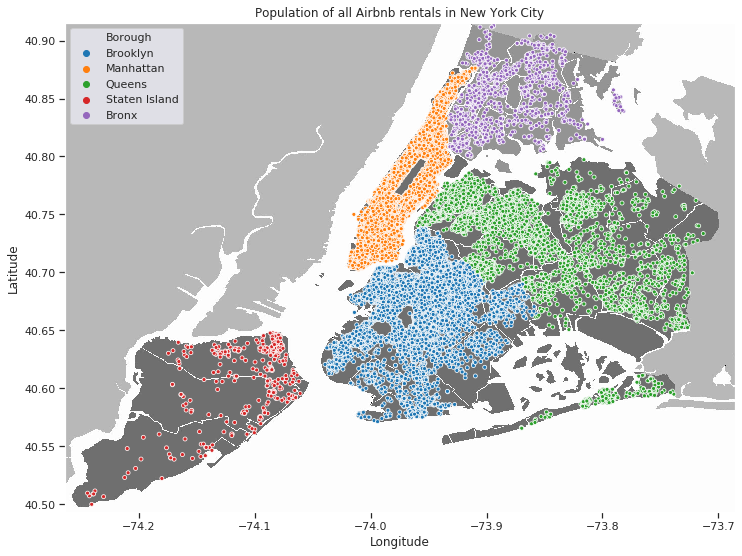

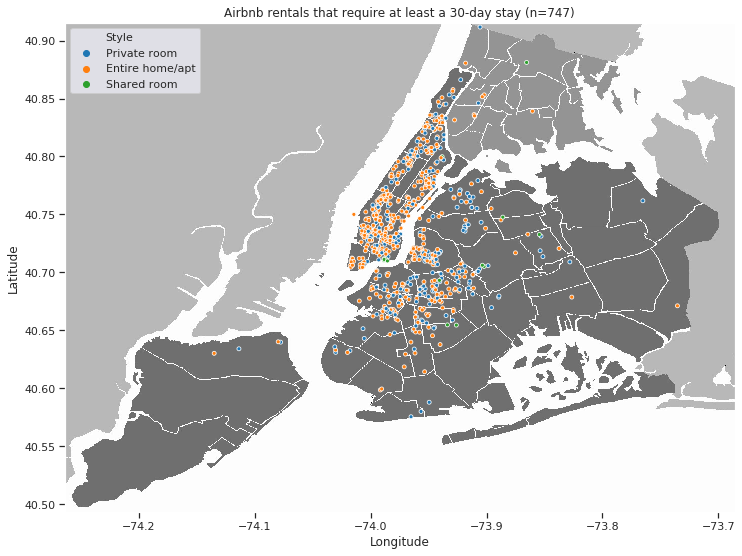

In [20]:
### CLEARLY, sorting by borough, we're able to see that airbnbs cover almost every
### available inch of New York City (not really, but there's a LOT)
### There are so many of them, though, that if we remove the map underlay, 
### we'd still largely be able to track or identify all 5 boroughs! 
### That's craaaaaaazy

nycMapPlot( df1, 'Borough', 
           "Population of all Airbnb rentals in New York City")          ### CONTEXT [all]
nycMapPlot( wtf1, 'Style', 
           "Airbnb rentals that require at least a 30-day stay (n=747)")      ### Distribution of 30+ day only rentals, by type

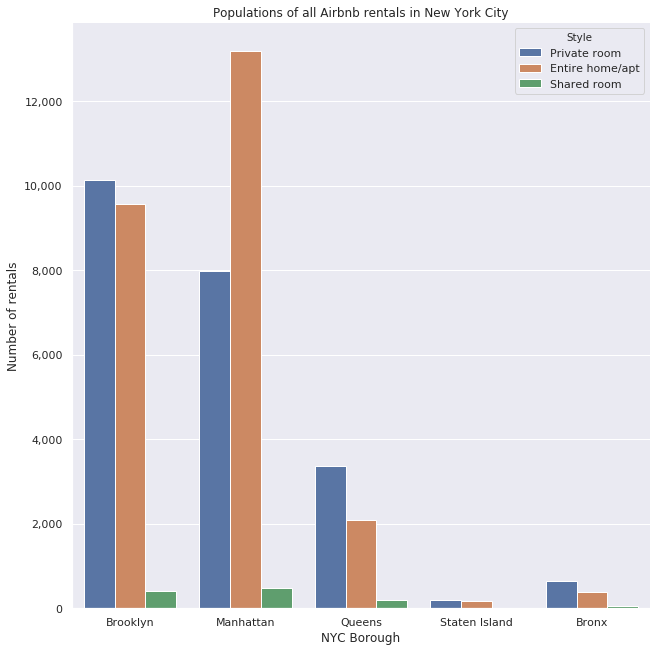

In [45]:
### Distribution of rental types, but from a different view

nycBarPlot( df1, 'Style', 
           "Populations of all Airbnb rentals in New York City");

In [5]:
 df1.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

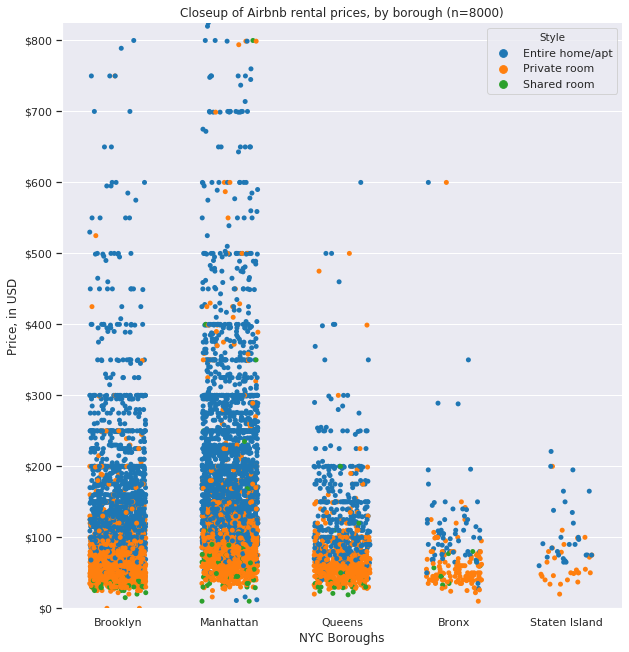

In [28]:
### MOVING ON to prices by borough, by rental type

wtfThatsALOT = df1.sample(8000)

nycPricePlot( wtfThatsALOT, 'Style',
             "Closeup of Airbnb rental prices, by borough (n=8000)")

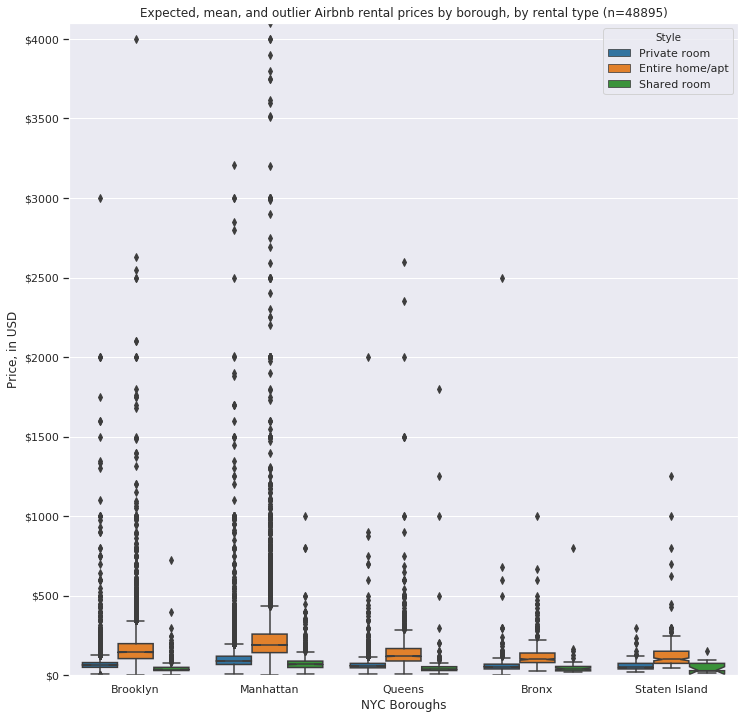

In [11]:
nycPriceBars( df1, 'Style',
             "Expected, mean, and outlier Airbnb rental prices by borough, by rental type (n=48895)")

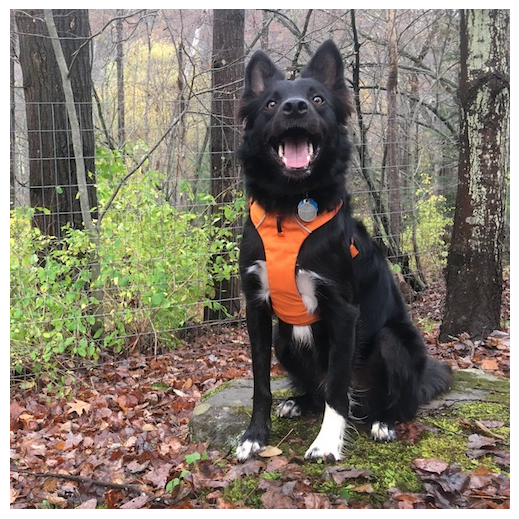

In [129]:
sns.dogplot()